# Import libraries
Following libraries has been used in this project:

In [1]:
# Numerical and data analysis

import numpy as np
import pandas as pd

# Data visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning tasks:

# Dummy and tree-based regression models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

# Ensemble regression models and Gradient Boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model selection and hyperparameter tuning tools
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

# Metrics for evaluating regression model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprocessing tool for feature scaling
from sklearn.preprocessing import StandardScaler

# Load dataset
Loading training and testing datasets from CSV files.

In [2]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Inspection and understanding the structure and completeness of the training and testing datasets.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.shape

(1460, 81)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
test.shape

(1459, 80)

Calculating the percentage of missing values for each column.

Sorting them in descending order.

Displaying the top 20 columns with the most missing values.

In [7]:
missing_percentage = train.isnull().sum() / len(train) * 100
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)
sorted_missing_percentage.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

Identifying and dropping columns from the 'train' dataset with more than 60% missing values.

Calculating the percentage of missing values in the 'test' dataset and sorting them.

In [8]:
columns_to_drop_train = missing_percentage[missing_percentage > 60].index
train = train.drop(columns=columns_to_drop_train)

In [9]:
missing_percentage_test = test.isnull().sum() / len(test) * 100
sorted_missing_percentage_test = missing_percentage_test.sort_values(ascending=False)
sorted_missing_percentage_test.head(20)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageCond       5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtHalfBath     0.137080
dtype: float64

Identifying and dropping columns from the 'test' dataset with more than 60% missing values.

Imputing missing values in both 'train' and 'test' datasets.

In [10]:
columns_to_drop_test = missing_percentage_test[missing_percentage_test > 60].index
test = test.drop(columns=columns_to_drop_test)

In [11]:
for col in train.columns:
    if train[col].dtype != 'object':
        train[col].fillna(train[col].mean(), inplace = True)
        if col in test.columns:
            test[col].fillna(test[col].mean(), inplace = True)

for col in train.columns:
    if train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace = True)
        if col in test.columns:
            test[col].fillna(test[col].mode()[0], inplace = True)
            
print('missing value in train set is:', train.isnull().sum().sum())
print('missing value in test set is:', test.isnull().sum().sum())

missing value in train set is: 0
missing value in test set is: 0


Visualizing missing values in the 'train' and 'test' datasets using heatmaps.

Displaying a summary of the columns (and their data types) in both datasets.

<AxesSubplot:>

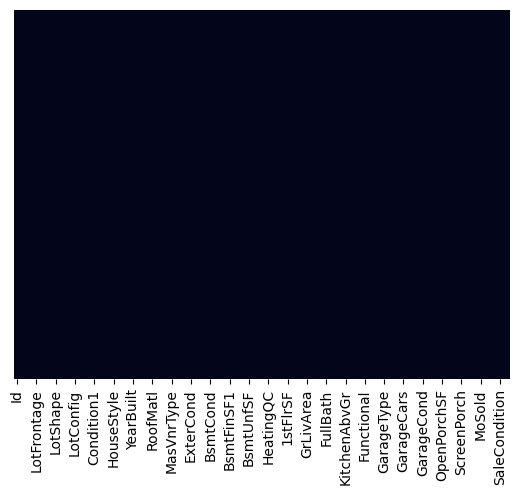

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

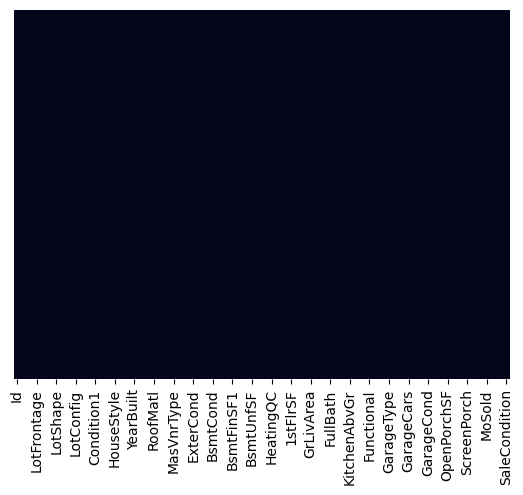

In [13]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Defining a list of column names associated with categorical features in the dataset.

In [16]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

Checking for unique categorical values that are present in the 'train' dataset but not in the 'test' dataset and vice versa.

In [17]:
for column in columns:
    train_categories = set(train[column].unique())
    test_categories = set(test[column].unique())
    
    
    only_in_train = train_categories - test_categories
    only_in_test = test_categories - train_categories
    
    if only_in_train or only_in_test:
        print(f"Column: {column}")
        if only_in_train:
            print(f"Categories only in train: {only_in_train}")
        if only_in_test:
            print(f"Categories only in test: {only_in_test}")
        print("\n")

Column: Utilities
Categories only in train: {'NoSeWa'}


Column: Condition2
Categories only in train: {'RRAn', 'RRNn', 'RRAe'}


Column: HouseStyle
Categories only in train: {'2.5Fin'}


Column: RoofMatl
Categories only in train: {'Metal', 'Roll', 'ClyTile', 'Membran'}


Column: Exterior1st
Categories only in train: {'Stone', 'ImStucc'}


Column: Exterior2nd
Categories only in train: {'Other'}


Column: Heating
Categories only in train: {'Floor', 'OthW'}


Column: Electrical
Categories only in train: {'Mix'}


Column: GarageQual
Categories only in train: {'Ex'}




Inspecting the 'train' dataset for specific categories that might be rare or missing in certain columns.

Printing the count of each of these categories if they are present.

In [18]:
columns_with_missing_values = {
    'Utilities': ['NoSeWa'],
    'Condition2': ['RRAn', 'RRAe', 'RRNn'],
    'HouseStyle': ['2.5Fin'],
    'RoofMatl': ['Metal', 'Roll', 'Membran', 'ClyTile'],
    'Exterior1st': ['ImStucc', 'Stone'],
    'Exterior2nd': ['Other'],
    'Heating': ['Floor', 'OthW'],
    'Electrical': ['Mix'],
    'GarageQual': ['Ex']
}

for column, missing_values in columns_with_missing_values.items():
    print(f"Column: {column}")
    for value in missing_values:
        count = train[column].value_counts().get(value, 0)
        print(f"Value: {value}, Count: {count}")
    print("\n")

Column: Utilities
Value: NoSeWa, Count: 1


Column: Condition2
Value: RRAn, Count: 1
Value: RRAe, Count: 1
Value: RRNn, Count: 2


Column: HouseStyle
Value: 2.5Fin, Count: 8


Column: RoofMatl
Value: Metal, Count: 1
Value: Roll, Count: 1
Value: Membran, Count: 1
Value: ClyTile, Count: 1


Column: Exterior1st
Value: ImStucc, Count: 1
Value: Stone, Count: 2


Column: Exterior2nd
Value: Other, Count: 1


Column: Heating
Value: Floor, Count: 1
Value: OthW, Count: 2


Column: Electrical
Value: Mix, Count: 1


Column: GarageQual
Value: Ex, Count: 3




Filtering out rows in the 'train' dataset that have specified rare or missing values in the designated columns.

In [19]:
for column, values in columns_with_missing_values.items():
    for value in values:
        train = train[train[column] != value]

Ensuring both 'train' and 'test' datasets have the same set of categories for each column.

This is done to avoid discrepancies when creating dummy variables.

After setting the categories, we convert the categorical columns to dummy variables (one-hot encoding) while dropping  the first category to avoid multicollinearity.

In [20]:
for column in columns:
    train_categories = set(train[column].unique())
    test_categories = set(test[column].unique())
    
    combined_categories = train_categories.union(test_categories)
    
    train[column] = pd.Categorical(train[column], categories=combined_categories)
    test[column] = pd.Categorical(test[column], categories=combined_categories)


train_final = pd.get_dummies(train, columns=columns, drop_first=True)
test_final = pd.get_dummies(test, columns=columns, drop_first=True)

In [21]:
train_final.shape

(1433, 222)

In [22]:
test_final.shape

(1459, 221)

In [23]:
X = train_final.drop('SalePrice', axis = 1)
Y = train_final['SalePrice']

Splitting the data into training and testing sets, using 20% of the data for testing.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train , Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 42)

# Dummy Regression

Separating the 'SalePrice' column to create the feature matrix (X_train) and target vector (Y_train).

Training a dummy regressor to predict the mean value of 'SalePrice' for all samples.

Using a DummyRegressor as a baseline model to evaluate its performance with 5-fold cross-validation.

The regressor predicts the mean of 'SalePrice' for all inputs.

The negative mean squared error is used as the scoring metric.

In [25]:
X_train = train_final.drop('SalePrice', axis = 1)
Y_train = train_final['SalePrice']

In [26]:
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train, Y_train)

DummyRegressor()

In [27]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_scores = cross_val_score(dummy_regr, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
mean_dummy_score = np.mean(dummy_scores)

print(f"Baseline Model Score (MSE): {-mean_dummy_score:.2f}")

Baseline Model Score (MSE): 6287065479.67


# Decision tree

Setting up hyperparameter tuning for the DecisionTreeRegressor using GridSearchCV.

Exploring various values for max depth, minimum samples to split, minimum samples per leaf, splitter type, and criterion.

Using 5-fold cross-validation and negative mean squared error as the scoring metric.

Evaluating the performance of the best DecisionTreeRegressor (found through GridSearchCV).

The model is evaluated on the training data using Mean Squared Error (MSE) and Mean Absolute Error (MAE).

The results of these evaluations, as well as the average MSE obtained from 5-fold cross-validation.

In [28]:
dt = DecisionTreeRegressor()

param_grid_dt = {
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random'],
    'criterion': ['mse', 'friedman_mse', 'mae']
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, 
                              scoring='neg_mean_squared_error', cv=5, 
                              n_jobs=-1, verbose=0)

grid_search_dt.fit(X_train, Y_train)
best_params_dt = grid_search_dt.best_params_
print(f"Best parameters for Decision Tree: {best_params_dt}")

/Users/mohsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/mohsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/mohsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/mohsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/mohsen/op

Best parameters for Decision Tree: {'criterion': 'mae', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}


In [29]:
cv_mse_dt = -grid_search_dt.best_score_

best_dt = grid_search_dt.best_estimator_
predictions_dt = best_dt.predict(X_train)

mae_dt = mean_absolute_error(Y_train, predictions_dt)
mse_dt = mean_squared_error(Y_train, predictions_dt)

print(f"Average 5-Fold Cross-Validated MSE (Decision Tree): {cv_mse_dt:.2f}")
print(f"Mean Absolute Error (Decision Tree): {mae_dt:.2f}")
print(f"Mean Squared Error (Decision Tree): {mse_dt:.2f}")

Average 5-Fold Cross-Validated MSE (Decision Tree): 1432452711.44
Mean Absolute Error (Decision Tree): 9596.55
Mean Squared Error (Decision Tree): 380790942.53


# Random Forest(100 trees)

Setting up hyperparameter tuning for the RandomForestRegressor with 100 trees using GridSearchCV.

Exploring various values for max depth, minimum samples to split, and minimum samples per leaf.

Using 5-fold cross-validation and negative mean squared error as the scoring metric.

Once GridSearchCV is executed, the best parameters for the Random Forest model are printed.

Evaluating the performance of the best RandomForestRegressor with 100 trees (found through GridSearchCV).

The model is evaluated on the training data using Mean Squared Error (MSE) and Mean Absolute Error (MAE).

The results of these evaluations, as well as the average MSE from 5-fold cross-validation.

In [30]:
rf_100 = RandomForestRegressor(n_estimators=100)

param_grid_100 = {
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf_100 = GridSearchCV(estimator=rf_100, param_grid=param_grid_100, 
                                  scoring='neg_mean_squared_error', cv=5, 
                                  n_jobs=-1, verbose=0)


grid_search_rf_100.fit(X_train, Y_train)
best_params_rf_100 = grid_search_rf_100.best_params_
print(f"Best parameters for Random Forest (100 trees): {best_params_rf_100}")

Best parameters for Random Forest (100 trees): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [31]:
cv_mse = -grid_search_rf_100.best_score_  

best_rf_100 = grid_search_rf_100.best_estimator_  
predictions_rf_100 = best_rf_100.predict(X_train)

mae = mean_absolute_error(Y_train, predictions_rf_100)
mse = mean_squared_error(Y_train, predictions_rf_100)

print(f"Average 5-Fold Cross-Validated MSE: {cv_mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

Average 5-Fold Cross-Validated MSE: 843479053.36
Mean Absolute Error: 6408.78
Mean Squared Error: 117738819.42


#  Random Forest ( 500 trees )
Setting up hyperparameter tuning for the RandomForestRegressor with 500 trees using GridSearchCV.

Exploring various values for max depth, minimum samples to split, and minimum samples per leaf.

Using 5-fold cross-validation and negative mean squared error as the scoring metric.

Evaluating the performance of the best RandomForestRegressor with 500 trees (determined through GridSearchCV).

The model is evaluated on the training data using Mean Squared Error (MSE) and Mean Absolute Error (MAE).

The results of these evaluations, as well as the average MSE from 5-fold cross-validation.


In [32]:
rf_500 = RandomForestRegressor(n_estimators=500)

param_grid_500 = {
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf_500 = GridSearchCV(estimator=rf_500, param_grid=param_grid_500, 
                                  scoring='neg_mean_squared_error', cv=5, 
                                  n_jobs=-1, verbose=0)

grid_search_rf_500.fit(X_train, Y_train)
best_params_rf_500 = grid_search_rf_500.best_params_
print(f"Best parameters for Random Forest (500 trees): {best_params_rf_500}")

Best parameters for Random Forest (500 trees): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [33]:
cv_mse = -grid_search_rf_500.best_score_  

best_rf_500 = grid_search_rf_500.best_estimator_  
predictions_rf_500 = best_rf_500.predict(X_train)

mae = mean_absolute_error(Y_train, predictions_rf_500)
mse = mean_squared_error(Y_train, predictions_rf_500)

print(f"Average 5-Fold Cross-Validated MSE: {cv_mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

Average 5-Fold Cross-Validated MSE: 836043706.44
Mean Absolute Error: 6256.78
Mean Squared Error: 110306353.12


# gradient boosting
Hyperparameter tuning for GradientBoostingRegressor using GridSearchCV.

Exploring various values for number of estimators, learning rate, max depth, subsampling rate, and the number of max features to consider.

Utilizing 5-fold cross-validation and evaluating models based on negative mean squared error.

Evaluating the performance of the best GradientBoostingRegressor (determined through GridSearchCV).

The model is assessed on the training data using Mean Squared Error (MSE) and Mean Absolute Error (MAE).

The results of these evaluations, as well as the average MSE from 5-fold cross-validation.

In [34]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}


gb = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=0)
grid_search_gb.fit(X_train, Y_train)

print("Best hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
best_gb = grid_search_gb.best_estimator_
cv_mse_gb = -grid_search_gb.best_score_
print("Cross-validated Mean Squared Error for Gradient Boosting:", cv_mse_gb)

Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 1.0}
Cross-validated Mean Squared Error for Gradient Boosting: 641253053.4481603


In [35]:
cv_mse_gb = -grid_search_gb.best_score_  
predictions_gb = grid_search_gb.best_estimator_.predict(X_train)

mae_gb = mean_absolute_error(Y_train, predictions_gb)
mse_gb = mean_squared_error(Y_train, predictions_gb)

print(f"Average 5-Fold Cross-Validated MSE for Gradient Boosting: {cv_mse_gb:.2f}")
print(f"Mean Absolute Error for Gradient Boosting: {mae_gb:.2f}")
print(f"Mean Squared Error for Gradient Boosting: {mse_gb:.2f}")

Average 5-Fold Cross-Validated MSE for Gradient Boosting: 641253053.45
Mean Absolute Error for Gradient Boosting: 7527.41
Mean Squared Error for Gradient Boosting: 98064128.85


Training the GradientBoostingRegressor with the optimal hyperparameters previously determined.
predictions are made on both training and testing sets.

Mean Squared Error (MSE) for both training and testing predictions is computed.

A simple check is implemented to detect if the model might be overfitting based on the comparison of training and testing MSE.

In [36]:
gb = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=4,
    max_features='sqrt',
    n_estimators=200,
    subsample=0.9,
    random_state=42
)
gb.fit(X_train, Y_train)

train_preds = gb.predict(X_train)
test_preds = gb.predict(X_test)

train_mse = mean_squared_error(Y_train, train_preds)
test_mse = mean_squared_error(Y_test, test_preds)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

if test_mse > train_mse:
    print("Possible overfitting detected!")
else:
    print("No obvious signs of overfitting.")

Training MSE: 167638380.53980792
Test MSE: 157245732.158963
No obvious signs of overfitting.


Calculating the R^2 score for the predictions made on the test set.

In [37]:
r2 = r2_score(Y_test, test_preds)
print(f"R^2 Score: {r2}")

R^2 Score: 0.9709281051313552


Visualizing the distributions of the training and testing target values (Y_train and Y_test).

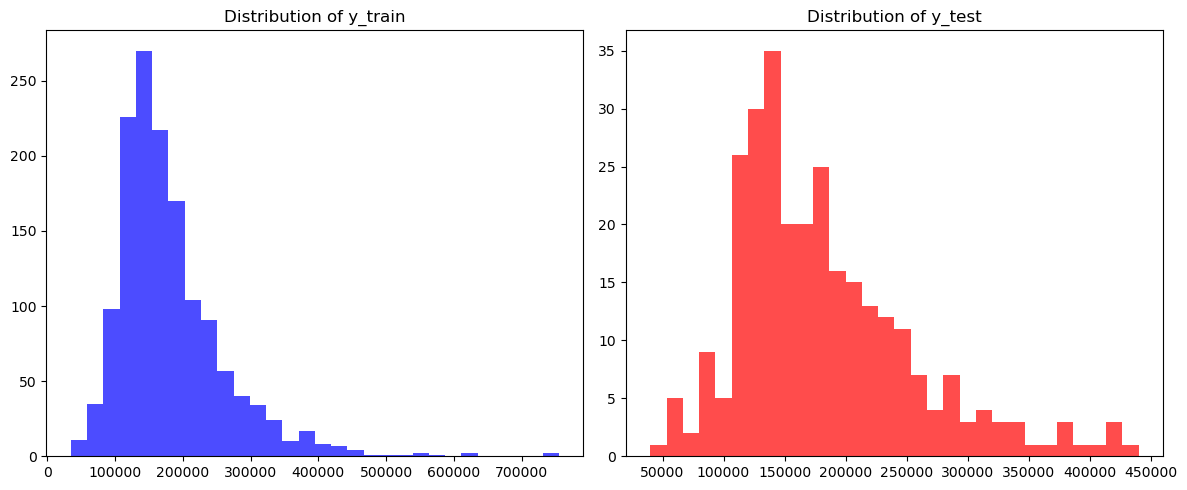

In [38]:


fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

axs[0].hist(Y_train, bins=30, color='blue', alpha=0.7)
axs[0].set_title('Distribution of y_train')

axs[1].hist(Y_test, bins=30, color='red', alpha=0.7)
axs[1].set_title('Distribution of y_test')

plt.show()

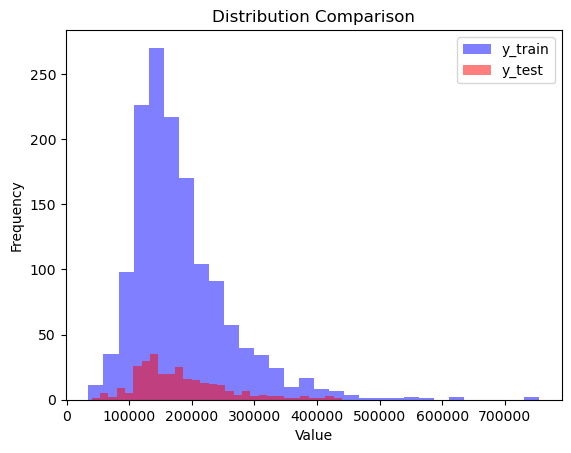

In [39]:
import matplotlib.pyplot as plt

plt.hist(Y_train, bins=30, color='blue', alpha=0.5, label='y_train')
plt.hist(Y_test, bins=30, color='red', alpha=0.5, label='y_test')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution Comparison')
plt.show()

Calculating the Wasserstein distance between the distributions of Y_train and Y_test.

(This metric provides a measure of the dissimilarity between two distributions).

In [40]:


from scipy.stats import wasserstein_distance

distance = wasserstein_distance(Y_train, Y_test)

print(f"Wasserstein distance between y_train and y_test: {distance}")

Wasserstein distance between y_train and y_test: 4612.414994006385


Combining training and testing data into a single dataset, `X_full` and `Y_full`.

Using this combined dataset, a GradientBoostingRegressor model is trained with previously determined optimal hyperparameters.

This final model uses the entire available data for training to potentially achieve better generalization on unseen data.

In [41]:
X_full = pd.concat([X_train, X_test])
Y_full = pd.concat([Y_train, Y_test])

gb_final = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=4,
    max_features='sqrt',
    n_estimators=200,
    subsample=0.9,
    random_state=42
)

gb_final.fit(X_full, Y_full)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',
                          n_estimators=200, random_state=42, subsample=0.9)

Generating predictions for the Kaggle competition using the final GradientBoostingRegressor model trained on the entire dataset.

In [42]:
kaggle_predictions = gb_final.predict(test_final)

submission = pd.DataFrame({
    'Id': test_final['Id'],
    'SalePrice': kaggle_predictions
})

submission.to_csv('kaggle_submission.csv', index=False)